In [41]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def mp3_to_txt(mp3_file, txt_file, sampling_rate=1000):
    audio = AudioSegment.from_mp3(mp3_file)
    audio = audio.set_frame_rate(sampling_rate).set_channels(1) 
    samples = np.array(audio.get_array_of_samples()) / (2 ** 15)  # Normalize to [-1, 1]
    duration = len(samples) / sampling_rate
    time = np.linspace(0, duration, len(samples))
    with open(txt_file, 'w') as f:
        f.write("Time(s)\tAmplitude\n")  # Header
        for t, amp in zip(time, samples):
            f.write(f"{t:.6f}\t{amp:.6f}\n")

mp3_to_txt("input.mp3", "output.txt", sampling_rate=1000)


In [42]:
def load(file):
    data = np.loadtxt(file, skiprows=1)
    time = data[:, 0]
    signal = data[:, 1] 
    return time, signal

time, signal = load('output.txt')

In [43]:
def normalise(signal):
    return signal / np.max(np.abs(signal))
signal_ns = normalise(signal)

In [44]:
def sliding_window(signal, size, step):
    windows = []
    for i in range(0, len(signal) - size, step):
        windows.append(signal[i:i + size])
    return np.array(windows)

size = 10000 
step = 3000
windows = sliding_window(signal, size, step)

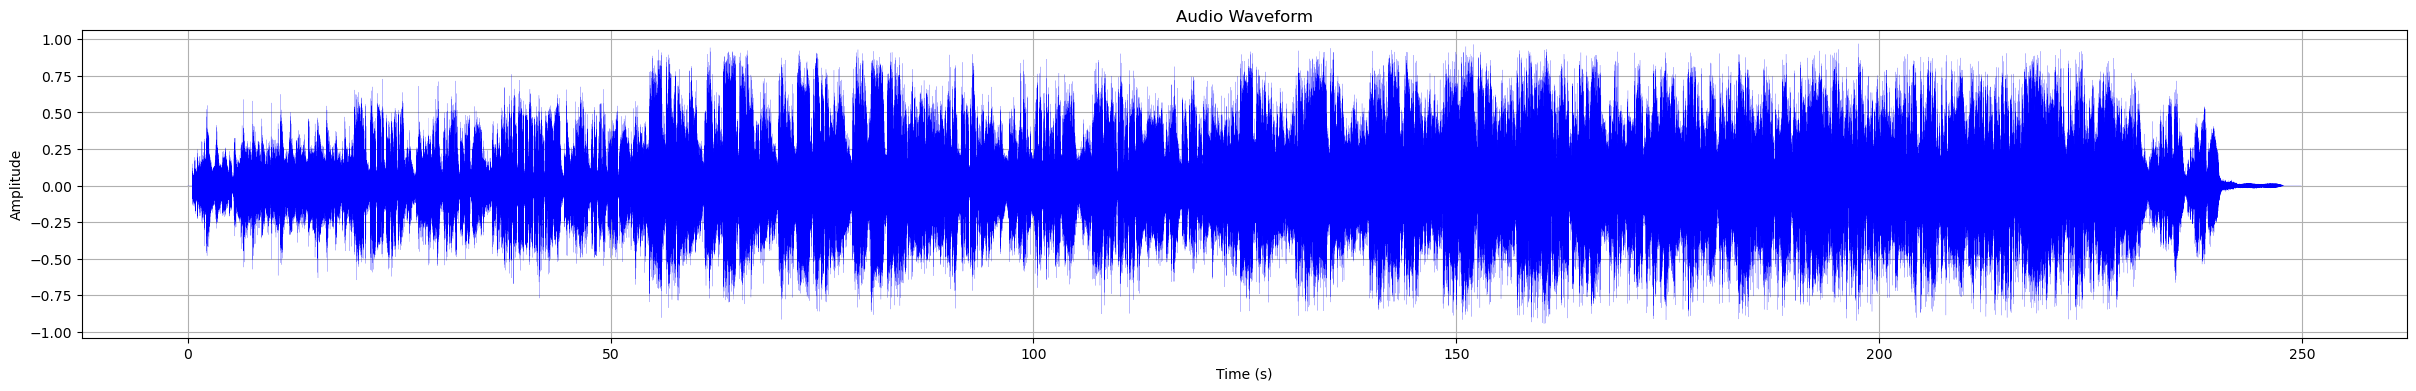

In [52]:
plt.figure(figsize=(30, 4))
plt.plot(time, signal, color='blue', linewidth = 0.1)
plt.title("Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [46]:
from statsmodels.tsa.ar_model import AutoReg
order = 3
def autoregressive_method(window, order=3):
    model = AutoReg(window, lags=order)
    model_fitted = model.fit() 
    ar_coeffs = model_fitted.params[1:]
    return ar_coeffs

ar_coeffs = np.array([autoregressive_method(window, order) for window in windows])
print("AR Coefficients:", ar_coeffs.mean(axis=0))


AR Coefficients: [-0.03826822 -0.1620632  -0.03174864]


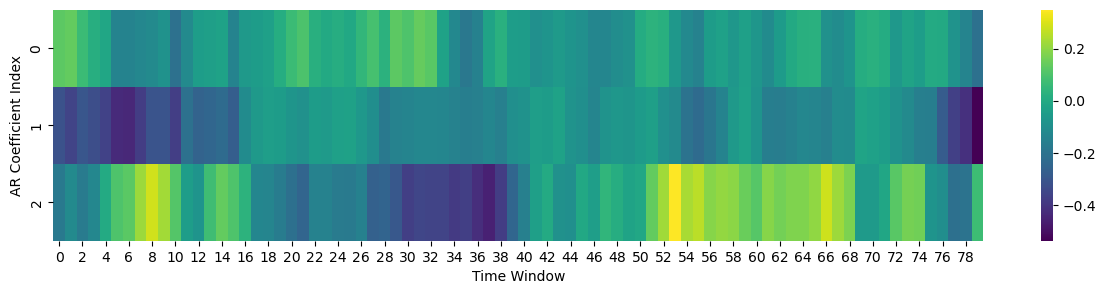

In [47]:
plt.figure(figsize=(15, 3))
sns.heatmap(ar_coeffs.T, cmap='viridis', cbar=True, annot=False)
plt.xlabel('Time Window')
plt.ylabel('AR Coefficient Index')
plt.show()